# 설치와 임포팅

In [1]:
!pip install tensorflow-datasets

In [2]:
!pip install tfds-nightly

     |████████████████████████████████| 4.3 MB 5.2 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

# MNIST with tfds

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential


ds_train, ds_test = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img).cache().batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).cache().batch(128).prefetch(tf.data.AUTOTUNE)


model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

model.fit(ds_train, epochs=6, validation_data=ds_test)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/6
469/469 [==============================] - 16s 34ms/step - loss: 0.3545 - acc: 0.9004 - val_loss: 0.1912 - val_acc: 0.9436
Epoch 2/6
469/469 [==============================] - 4s 9ms/step - loss: 0.1652 - acc: 0.9532 - val_loss: 0.1364 - val_acc: 0.9592
Epoch 3/6
469/469 [==============================] - 4s 9ms/step - loss: 0.1182 - acc: 0.9668 - val_loss: 0.1140 - val_acc: 0.9661
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - acc: 0.9749 - val_loss: 0.1019 - val_acc: 0.9697
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0729 - acc: 0.9800 - val_loss: 0.0939 - val_acc: 0.9724
Epoch 6/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0597 - acc: 0.9837 - val_loss: 0.0877 - val_acc: 0.9732


# 사용 가능한 데이터셋 리스트

카탈로그 : https://www.tensorflow.org/datasets/catalog/overview

In [5]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

# 데이터 로딩

In [6]:
from pprint import pprint

## tfds.load()

In [7]:
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'])
print(len(train_ds))
print(len(test_ds))

60000
10000


## tfds.builder()

In [8]:
builder = tfds.builder('mnist')

train_ds, test_ds = builder.as_dataset(shuffle_files=True, split=['train', 'test'])
print(len(train_ds))
print(len(test_ds))

60000
10000


# 데이터 나누기

https://www.tensorflow.org/datasets/splits

## 'train', 'test', 'train+test'

In [9]:
train_ds = tfds.load('mnist', split='train')

print(len(train_ds))

60000


In [10]:
test_ds = tfds.load('mnist', split='test')

print(len(test_ds))

10000


In [11]:
all_ds = tfds.load('mnist', split='train+test')

print(len(all_ds))

70000


In [12]:
all_ds = tfds.load('mnist', split='all')

print(len(all_ds))

70000


## slice

In [13]:
ds = tfds.load('mnist', split='train[:1000]')
print(len(ds))

1000


In [14]:
ds = tfds.load('mnist', split='train[100:1000]')
print(len(ds))

900


In [15]:
ds = tfds.load('mnist', split='train[:50%]')
print(len(ds))

30000


In [16]:
ds = tfds.load('mnist', split='train[25%:50%]')
print(len(ds))

15000


In [17]:
ds = tfds.load('mnist', split='train[:50%]+test')
print(len(ds))

40000


## multiple

In [18]:
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'])

print(len(train_ds))
print(len(test_ds))

60000
10000


In [19]:
train_ds, train50p_ds, test_ds = tfds.load('mnist', split=['train', 'train[:50%]', 'test'])

print(len(train_ds))
print(len(train50p_ds))
print(len(test_ds))

60000
30000
10000


## splits

In [20]:
splits = tfds.even_splits('train', n=4)

dss = tfds.load('mnist', split=splits)
print(len(dss))
print(len(dss[0]))
print(len(dss[1]))
print(len(dss[2]))
print(len(dss[3]))


4
15000
15000
15000
15000


In [21]:
splits = tfds.even_splits('train', n=4)

ds = tfds.load('mnist', split=splits[3])
print(len(ds))

15000


## cross validation

In [22]:
vals_ds = tfds.load('mnist', split=[
    f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)
])
trains_ds = tfds.load('mnist', split=[
    f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)
])

k가 20이라면

valid는 [20%:30%] 이고

train은 [:20%] + [30%:]이다.

# 반복해서 꺼내기

In [23]:
ds = tfds.load('mnist', split='train[:20]')

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()


## 꺼내는 횟수

In [24]:
ds = tfds.load('mnist', split='train')
ds = ds.take(1)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(28, 28, 1) ()


In [25]:
ds = tfds.load('mnist', split='train')
ds = ds.take(3)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(28, 28, 1) ()
(28, 28, 1) ()
(28, 28, 1) ()


## batch size

In [26]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(2).take(3)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(2, 28, 28, 1) (2,)
(2, 28, 28, 1) (2,)
(2, 28, 28, 1) (2,)


In [27]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(4).take(3)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(4, 28, 28, 1) (4,)
(4, 28, 28, 1) (4,)
(4, 28, 28, 1) (4,)


In [28]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(10000)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)


In [29]:
ds = tfds.load('mnist', split='train', batch_size=10000)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)
(10000, 28, 28, 1) (10000,)


# 데이터 1번 꺼내기

In [30]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(2).take(3)

example = next(iter(ds))
image = example["image"]
label = example["label"]
print(image.shape, label.shape)

(2, 28, 28, 1) (2,)


# 데이터 정보

In [52]:
ds, info = tfds.load('mnist', split='train', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [32]:
builder = tfds.builder('mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


## 카테고리 정보 보기

In [53]:
ds, info = tfds.load('mnist', split='train', with_info=True)
print(info.features)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


In [54]:
ds, info = tfds.load('cifar10', split='train', with_info=True)
print(info.features['label'].num_classes)
print(info.features['label'].names)
print(info.features['label'].int2str(2))
print(info.features['label'].str2int("bird"))

10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
bird
2


# 레이블을 별개의 dataset으로

In [35]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(16).take(4)

for example in ds:
  image = example["image"]
  label = example["label"]
  print(image.shape, label.shape)

(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)


In [36]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.batch(16).take(4)

for image, label in ds:
  print(image.shape, label.shape)

(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)
(16, 28, 28, 1) (16,)


# numpy로 변환

In [37]:
ds = tfds.load('mnist', split='train', batch_size=-1, as_supervised=True)

image, label = tfds.as_numpy(ds)
print(image.shape)
print(label.shape)

(60000, 28, 28, 1)
(60000,)


# 이미지 보기

In [38]:
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


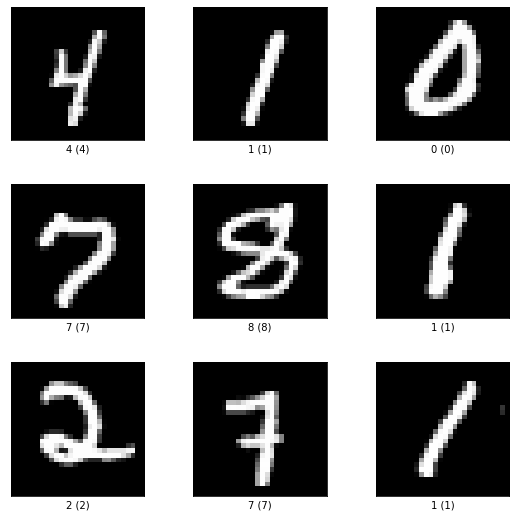

In [39]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

# 전처리 함수 적용

In [40]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds = tfds.load('mnist', split='train', as_supervised=True)

ds = ds.map(normalize_img).cache().batch(128).prefetch(tf.data.AUTOTUNE)

# prefetch

미리(pre) 가져와(fetch) 놓는다. 

데이터 로딩 속도를 개선해 준다.

In [41]:
ds_train, ds_test = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img).cache().batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).cache().batch(128).prefetch(tf.data.AUTOTUNE)

# numpy 데이터로 Dataset 생성

In [42]:
ds = tfds.load('mnist', split='train', batch_size=-1, as_supervised=True)

image, label = tfds.as_numpy(ds)
print(image.shape)
print(label.shape)

(60000, 28, 28, 1)
(60000,)


In [43]:
new_ds = tf.data.Dataset.from_tensor_slices((image, label))

batch_image, batch_label = next(iter(new_ds.batch(32).take(1)))
print(batch_image.shape)
print(batch_label.shape)

(32, 28, 28, 1)
(32,)


# pandas 데이터로 Dataset 생성

In [44]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [45]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

24576/13273 [=======================================================] - 0s 0us/step


In [46]:
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [47]:
target = df.pop('target')

In [48]:
feature = df[['age', 'thalach', 'trestbps',  'chol', 'oldpeak']]
feature.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [49]:
ds = tf.data.Dataset.from_tensor_slices((feature.values, target.values))
ds = ds.shuffle(len(ds)).batch(16)

batch_feature, batch_target = next(iter(ds))
print(batch_feature.shape)
print(batch_target.shape)

(16, 5)
(16,)
